In [25]:
# ------------------------------------------------------------
# CELDA 1 — IMPORTAR LIBRERÍAS Y CONFIGURACIÓN INICIAL
# ------------------------------------------------------------
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
import random
import warnings
warnings.filterwarnings("ignore")

# Configuración visual
plt.style.use("seaborn-v0_8")
pd.options.display.max_columns = 50
pd.options.display.max_rows = 20

print("✅ Librerías cargadas correctamente.")


✅ Librerías cargadas correctamente.


In [26]:
# ------------------------------------------------------------
# CELDA 2 — CARGAR LAS CALLES DEL PARTIDO DE LA PLATA
# ------------------------------------------------------------
streets = gpd.read_file("data/partido.geojson")

# Asegurarse de que esté en CRS geográfico (lat/lon)
streets = streets.to_crs(epsg=4326)

print("✅ Calles cargadas:", len(streets))
display(streets.head())


✅ Calles cargadas: 14271


,id,@id,4wd_only,abandoned,access,admin_level,alt_name,area,bicycle,bicycle:lanes,boundary,bridge,bridge:name,bus_bay,check_date,check_date:surface,construction,covered,crossing,crossing:island,crossing:markings,cutting,cycleway,cycleway:both,cycleway:left,...,short_name,shoulder,sidewalk,sidewalk:both:surface,sidewalk:left,sidewalk:left:surface,sidewalk:right,sidewalk:right:surface,smoothness,source,sport,step_count,supervised,surface,surface:note,tactile_paving,taxi,tourist_bus,tracktype,tunnel,turn:lanes,vehicle:lanes,wheelchair,width,geometry
0,way/254328264,way/254328264,None,None,None,None,None,None,None,None,None,None,None,None,NaT,NaT,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-57.9363 -34.94583, -57.93665 -34.94..."
1,way/271123779,way/271123779,None,None,None,None,None,yes,None,None,None,None,None,None,NaT,NaT,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,fine_gravel,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-57.94045 -34.93234, -57.94069 -34.9..."
2,way/283164220,way/283164220,None,None,None,None,None,yes,None,None,None,None,None,None,NaT,NaT,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-57.97452 -34.91696, -57.97443 -34.9..."
3,way/302946377,way/302946377,None,None,None,None,None,None,None,None,None,None,None,None,NaT,NaT,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-57.93761 -34.9471, -57.93749 -34.94..."
4,way/346874947,way/346874947,None,None,None,None,None,yes,None,None,None,None,None,None,NaT,NaT,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,concrete,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-57.93573 -34.91024, -57.93571 -34.9..."


✅ Archivo barrios.geojson creado correctamente en la carpeta 'data'.


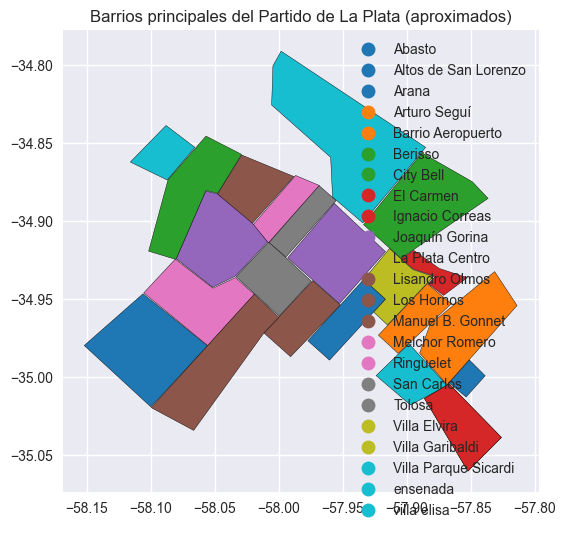

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# 23 barrios
barrios = [
    "La Plata Centro", "Altos de San Lorenzo", "Villa Elvira", "Los Hornos",
    "San Carlos", "Tolosa", "Ringuelet", "Berisso", "El Carmen", "ensenada",
    "Manuel B. Gonnet", "Joaquín Gorina", "Melchor Romero", "Abasto",
    "Lisandro Olmos", "City Bell", "villa elisa", "Arturo Seguí",
    "Barrio Aeropuerto", "Villa Parque Sicardi", "Arana", "Villa Garibaldi",
    "Ignacio Correas"
]

# 23 polígonos (cada uno corresponde a un barrio, cerrados correctamente)
poligonos = [
    Polygon([(-57.9932,-34.9236), (-57.9527,-34.9529), (-57.9168,-34.9196),
             (-57.9567,-34.8887), (-57.9932,-34.9236)]),
    Polygon([(-57.9774,-34.9767), (-57.9605,-34.9891), (-57.9168,-34.9500),
             (-57.9337,-34.9373), (-57.9774,-34.9767)]),
    Polygon([(-57.9336,-34.9374), (-57.9167,-34.9501), (-57.9260,-34.9583),
             (-57.9152,-34.9666), (-57.8792,-34.9355), (-57.8954,-34.9311),
             (-57.9136,-34.9176), (-57.9336,-34.9374)]),
    Polygon([(-57.9736,-34.9382), (-58.0117,-34.9717), (-57.9909,-34.9869),
             (-57.9521,-34.9538), (-57.9736,-34.9382)]),
    Polygon([(-58.0078,-34.9134), (-58.0335,-34.9356), (-57.9998,-34.9609),
             (-57.9747,-34.9385), (-58.0078,-34.9134)]),
    Polygon([(-58.0077,-34.9138), (-57.9945,-34.9230), (-57.9553,-34.8869),
             (-57.9688,-34.8772), (-58.0077,-34.9138)]),
    Polygon([(-58.0203,-34.9025), (-58.0083,-34.9140), (-57.9685,-34.8772),
             (-57.9870,-34.8708), (-58.0203,-34.9025)]),
    Polygon([(-57.9339,-34.9023), (-57.9047,-34.9239), (-57.8366,-34.8855),
             (-57.8490,-34.8748), (-57.8882,-34.8564), (-57.9339,-34.9023)]),
    Polygon([(-57.9046,-34.9243), (-57.8949,-34.9308), (-57.8778,-34.9355),
             (-57.8834,-34.9401), (-57.8714,-34.9476), (-57.8529,-34.9363),
             (-57.8747,-34.9304), (-57.8947,-34.9188), (-57.9046,-34.9243)]),
    Polygon([(-57.9581,-34.8846), (-57.9345,-34.9012), (-57.8854,-34.8528),
             (-57.9983,-34.7912), (-58.0047,-34.8006), (-58.0057,-34.8257),
             (-57.9596,-34.8592), (-57.9581,-34.8846)]),
    Polygon([(-58.0482,-34.8828), (-58.0212,-34.9019), (-57.9883,-34.8715),
             (-58.0291,-34.8577), (-58.0482,-34.8828)]),
    Polygon([(-58.0572,-34.8808), (-58.0802,-34.9241), (-58.0518,-34.9424),
             (-58.0339,-34.9352), (-58.0089,-34.9134), (-58.0206,-34.9015),
             (-58.0482,-34.8826), (-58.0572,-34.8808)]),
    Polygon([(-58.0810,-34.9244), (-58.1056,-34.9460), (-58.0556,-34.9798),
             (-58.0192,-34.9470), (-58.0340,-34.9362), (-58.0515,-34.9430),
             (-58.0810,-34.9244)]),
    Polygon([(-58.1062,-34.9466), (-58.1521,-34.9797), (-58.1001,-35.0190),
             (-58.0557,-34.9800), (-58.1062,-34.9466)]),
    Polygon([(-58.0998,-35.0195), (-58.0666,-35.0341), (-58.0114,-34.9713),
             (-58.0000,-34.9617), (-58.0192,-34.9468), (-58.0998,-35.0195)]),
    Polygon([(-58.0866,-34.8735), (-58.1018,-34.9193), (-58.0805,-34.9246),
             (-58.0570,-34.8804), (-58.0478,-34.8822), (-58.0292,-34.8573),
             (-58.0570,-34.8456), (-58.0866,-34.8735)]),
    Polygon([(-58.1161,-34.8622), (-58.0873,-34.8737), (-58.0657,-34.8528),
             (-58.0882,-34.8388), (-58.1161,-34.8622)]),
    Polygon([(-57.9223,-34.9731), (-57.9069,-34.9848), (-57.8654,-34.9530),
             (-57.8841,-34.9401), (-57.9223,-34.9731)]),
    Polygon([(-57.8901,-34.9846), (-57.8687,-35.0049), (-57.8140,-34.9541),
             (-57.8315,-34.9324), (-57.8819,-34.9662), (-57.8901,-34.9846)]),
    Polygon([(-57.9241,-34.9990), (-57.8973,-35.0178), (-57.8687,-35.0054),
             (-57.8984,-34.9786), (-57.9241,-34.9990)]),
    Polygon([(-57.8670,-35.0036), (-57.8538,-35.0127), (-57.8389,-34.9991),
             (-57.8512,-34.9890), (-57.8670,-35.0036)]),
    Polygon([(-57.8863,-35.0137), (-57.8524,-35.0602), (-57.8262,-35.0386),
             (-57.8671,-35.0043), (-57.8863,-35.0137)]),
    Polygon([(-57.8863,-35.0137), (-57.8524,-35.0602), (-57.8262,-35.0386),
             (-57.8671,-35.0043), (-57.8863,-35.0137)])
]

# Crear GeoDataFrame
gdf = gpd.GeoDataFrame({"barrio": barrios, "geometry": poligonos}, crs="EPSG:4326")

# Guardar a geojson
gdf.to_file("data/barrios.geojson", driver="GeoJSON")
print("✅ Archivo barrios.geojson creado correctamente en la carpeta 'data'.")

# Visualización
gdf.plot(column="barrio", cmap="tab10", legend=True, figsize=(8,6), edgecolor="black")
plt.title("Barrios principales del Partido de La Plata (aproximados)")
plt.show()





In [27]:
# ------------------------------------------------------------
# CELDA 1 — IMPORTAR LIBRERÍAS Y CONFIGURACIÓN INICIAL
# ------------------------------------------------------------
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
import random
import warnings
warnings.filterwarnings("ignore")

# Configuración visual
plt.style.use("seaborn-v0_8")
pd.options.display.max_columns = 50
pd.options.display.max_rows = 20

print("✅ Librerías cargadas correctamente.")


✅ Librerías cargadas correctamente.


In [17]:
# ------------------------------------------------------------
# CELDA 4 — FILTRAR CALLES DEL PARTIDO Y ASIGNAR BARRIO
# ------------------------------------------------------------
import geopandas as gpd

# Cargar barrios desde geojson (ya creado en la celda anterior)
barrios = gpd.read_file("data/barrios.geojson")

# Asegurar que ambos GeoDataFrames tengan el mismo CRS
if streets.crs != barrios.crs:
    barrios = barrios.to_crs(streets.crs)

# Hacer una copia de streets para trabajar
streets_lp = streets.copy()

# Asignar barrio usando join espacial (intersección)
streets_with_barrio = gpd.sjoin(
    streets_lp, 
    barrios[["barrio", "geometry"]], 
    how="left", 
    predicate="intersects"
)

print("✅ Calles con barrio asignado:", len(streets_with_barrio))
display(streets_with_barrio[["name", "barrio"]].head(10))



✅ Calles con barrio asignado: 14840


,name,barrio
0,None,Altos de San Lorenzo
1,None,La Plata Centro
2,None,La Plata Centro
3,None,Altos de San Lorenzo
4,None,La Plata Centro
5,None,La Plata Centro
6,None,La Plata Centro
7,None,City Bell
8,None,NaN
9,None,villa elisa


In [28]:
# ------------------------------------------------------------
# CELDA 3 — DETECTAR CALLES EN >1 BARRIO
# ------------------------------------------------------------
import numpy as np

# Normalizar los nombres de las calles
streets_with_barrio["name_norm"] = (
    streets_with_barrio["name"]
    .astype(str)
    .str.strip()
    .str.lower()
    .replace({"none": np.nan})
)

# Contar cuántos barrios distintos tienen calles con el mismo nombre
street_barrio_groups = (
    streets_with_barrio.dropna(subset=["name_norm"])
    .groupby("name_norm")["barrio"]
    .nunique()
    .reset_index(name="n_barrios")
)

# Solo conservar calles que se asignan a más de 1 barrio usando centroides distintos
ambiguous_streets = street_barrio_groups[street_barrio_groups["n_barrios"] > 1].copy()

print("⚠️ Calles detectadas con más de un barrio asignado (centrado):", len(ambiguous_streets))
display(ambiguous_streets.sort_values("n_barrios", ascending=False).head(20))




⚠️ Calles detectadas con más de un barrio asignado (centrado): 396


,name_norm,n_barrios
279,calle 22,11
124,calle 14,11
206,calle 18,11
191,calle 17,11
242,calle 20,11
172,calle 16,11
150,calle 15,11
75,calle 12,10
807,calle 9,10
60,calle 11,10


In [19]:
# ------------------------------------------------------------
# CELDA A — GENERAR RUTAS (puras + mixtas) y CARGAR RUTAS REALES
# ------------------------------------------------------------
import os
import random
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString, Point
import numpy as np

random.seed(42)
np.random.seed(42)

# --- Parámetros base (ajustables) ---
PORC_MIXTAS = 0.7
PAQUETES_MIN, PAQUETES_MAX = 7000, 12000
CAMIONETA_CAPACIDAD_PROM = 85

# --- Rutas base (lista de barrios) ---
# Asegurate que 'barrios' exista (GeoDataFrame con columna 'barrio').
# Si no, cargar desde data/barrios.geojson:
try:
    barrios  # si ya existe, ok
except NameError:
    barrios = gpd.read_file("data/barrios.geojson")

rutas_puras = barrios["barrio"].tolist()

# --- Función para crear nombres mixtos (igual que la tuya) ---
def generar_ruta_mixta():
    combinaciones = [
        ["Berisso","Villa Elvira","El Carmen"],
        ["Los Hornos","San Carlos","Altos de San Lorenzo"],
        ["Tolosa","Ringuelet","City Bell"],
        ["Abasto","Lisandro Olmos","Melchor Romero"],
        ["Barrio Aeropuerto","Villa Parque Sicardi","Arana"],
        ["Manuel B. Gonnet","Ringuelet","La Plata Centro"]
    ]
    zonas = random.choice(combinaciones)
    nombre = " → ".join(zonas)
    return nombre, zonas

# --- Calcular cuántas camionetas salen ese día (como antes) ---
total_paquetes = random.randint(PAQUETES_MIN, PAQUETES_MAX)
camionetas_necesarias = total_paquetes // CAMIONETA_CAPACIDAD_PROM
cant_mixtas = int(camionetas_necesarias * PORC_MIXTAS)
cant_puras = camionetas_necesarias - cant_mixtas

# --- Generar rutas simuladas (DataFrame temporal) ---
sim_data = []
for _ in range(cant_puras):
    ruta = random.choice(rutas_puras)
    base_entregas = random.randint(70,100)  # paradas esperadas
    mal_ubicados = random.randint(1,5)
    ambiguos = random.randint(1,10)
    if ruta in ["Berisso","El Carmen"]:
        mal_ubicados += random.randint(3,6)
        ambiguos += random.randint(5,10)
    # inferir tiempo total en minutos (estimación por parada)
    tiempo_total_min = round(base_entregas * random.uniform(1.8, 3.0), 1)
    efectividad = round(100 - ((mal_ubicados + ambiguos)/base_entregas*100),2)
    sim_data.append({
        "ruta": ruta,
        "tipo": "pura",
        "entregas_totales": base_entregas,
        "mal_ubicados": mal_ubicados,
        "ambiguos": ambiguos,
        "efectividad_%": efectividad,
        "tiempo_total_min": tiempo_total_min,
        "source": "simulada"
    })

for _ in range(cant_mixtas):
    ruta, zonas = generar_ruta_mixta()
    base_entregas = random.randint(80,110)
    mal_ubicados = random.randint(2,8)
    ambiguos = random.randint(3,12)
    tiempo_total_min = round(base_entregas * random.uniform(1.8, 3.0), 1)
    efectividad = round(100 - ((mal_ubicados + ambiguos)/base_entregas*100),2)
    sim_data.append({
        "ruta": ruta,
        "tipo": "mixta",
        "entregas_totales": base_entregas,
        "mal_ubicados": mal_ubicados,
        "ambiguos": ambiguos,
        "efectividad_%": efectividad,
        "tiempo_total_min": tiempo_total_min,
        "source": "simulada"
    })

sim_df = pd.DataFrame(sim_data)
# asignar id de camioneta a cada fila simulada
sim_df = sim_df.reset_index().rename(columns={"index":"sim_i"})
sim_df["ruta_id"] = sim_df["sim_i"].apply(lambda i: f"S{i+1:03d}")
sim_df = sim_df.drop(columns=["sim_i"])

# --- CARGAR RUTAS REALES (si hay) desde carpeta rutas_geojson ---
CARPETA_RUTAS = "rutas_geojson"  # pon tus geojsons aquí
reales_list = []
if os.path.isdir(CARPETA_RUTAS):
    for fname in sorted(os.listdir(CARPETA_RUTAS)):
        if fname.lower().endswith(".geojson") or fname.lower().endswith(".json"):
            path = os.path.join(CARPETA_RUTAS, fname)
            g = gpd.read_file(path)
            # si hay múltiples features, iterar y tomar properties si existen
            for i, row in g.iterrows():
                props = row.drop(labels="geometry").to_dict()
                ruta_name = props.get("ruta", props.get("name", f"real_{fname}_{i}"))
                n_paradas = props.get("n_paradas", None)
                tiempo = props.get("tiempo_total_min", props.get("tiempo", None))
                reales_list.append({
                    "ruta": ruta_name,
                    "tipo": props.get("tipo", "real"),
                    "entregas_totales": n_paradas if n_paradas is not None else (props.get("n_paradas_est", None) or 0),
                    "mal_ubicados": props.get("mal_ubicados", 0),
                    "ambiguos": props.get("ambiguos", 0),
                    "efectividad_%": props.get("efectividad_%", None),
                    "tiempo_total_min": tiempo,
                    "source": "real",
                    "geometry": row.geometry
                })
if len(reales_list) > 0:
    reales_df = pd.DataFrame(reales_list)
    reales_gdf = gpd.GeoDataFrame(reales_df, geometry="geometry", crs=g.crs)
else:
    reales_gdf = gpd.GeoDataFrame(columns=["ruta","tipo","entregas_totales","mal_ubicados","ambiguos","efectividad_%","tiempo_total_min","source","geometry"])

# --- Convertir sim_df a GeoDataFrame creando geometría aproximada (usando barrios) ---
# Función auxiliar: obtener centroid de un barrio (por nombre, case-insensitive)
def centroid_of_barrio(name, barrios_gdf=barrios):
    match = barrios_gdf[barrios_gdf["barrio"].str.lower() == str(name).strip().lower()]
    if len(match) == 0:
        return None
    return match.geometry.centroid.iloc[0]

from shapely.ops import linemerge

sim_geoms = []
for _, r in sim_df.iterrows():
    if r["tipo"] == "pura":
        c = centroid_of_barrio(r["ruta"])
        if c is None:
            # fallback: punto vacío
            sim_geoms.append(Point(0,0))
        else:
            # crear una pequeña línea para permitir interpolación (centroid -> centroid + pequeño offset)
            # offset en grados pequeño (aprox 0.001 ~ 100 m). Será convertido más tarde si es necesario.
            p1 = c
            p2 = Point(c.x + 0.0015, c.y + 0.0008)  # pequeño segmento
            sim_geoms.append(LineString([p1, p2]))
    else:
        # mixtas: conectar centroides de las zonas en orden
        zonas = [z.strip() for z in r["ruta"].split("→") if z.strip()] if "→" in r["ruta"] else [z.strip() for z in r["ruta"].split("->")]
        if len(zonas) == 1:
            c = centroid_of_barrio(zonas[0])
            if c is None:
                sim_geoms.append(LineString([Point(0,0), Point(0,0.001)]))
            else:
                sim_geoms.append(LineString([c, Point(c.x+0.0015, c.y+0.0008)]))
        else:
            pts = []
            for z in zonas:
                # permitir nombres con espacios y mayúsculas
                z_clean = z.strip()
                c = centroid_of_barrio(z_clean)
                if c is not None:
                    pts.append(c)
            if len(pts) >= 2:
                sim_geoms.append(LineString([p for p in pts]))
            elif len(pts) == 1:
                c = pts[0]
                sim_geoms.append(LineString([c, Point(c.x+0.001, c.y+0.001)]))
            else:
                sim_geoms.append(LineString([Point(0,0), Point(0.001,0.001)]))

sim_gdf = gpd.GeoDataFrame(sim_df, geometry=sim_geoms, crs=barrios.crs)

# --- UNIR reales_gdf y sim_gdf (si existen) ---
# Para reales, ya tenemos geometría; si no, reales_gdf está vacía.
# Estandarizar columnas y concatenar
cols = ["ruta","tipo","entregas_totales","mal_ubicados","ambiguos","efectividad_%","tiempo_total_min","source","geometry"]
# asegurar que ambas tengan las mismas columnas
for c in cols:
    if c not in sim_gdf.columns:
        sim_gdf[c] = None
    if c not in reales_gdf.columns:
        reales_gdf[c] = None

rutas_gdf = pd.concat([sim_gdf[cols], reales_gdf[cols]], ignore_index=True, sort=False)
rutas_gdf = gpd.GeoDataFrame(rutas_gdf, geometry="geometry", crs=barrios.crs)

# asignar ruta_id para las reales si no tienen
if "ruta_id" not in rutas_gdf.columns:
    rutas_gdf["ruta_id"] = [f"R{i+1:03d}" for i in range(len(rutas_gdf))]

# Si entregas_totales es 0 o NaN para reales, inferir un n aproximado
rutas_gdf["entregas_totales"] = rutas_gdf["entregas_totales"].fillna(0).astype(int)

display(rutas_gdf.head(12))
print("Total rutas (simuladas + reales):", len(rutas_gdf))


,ruta,tipo,entregas_totales,mal_ubicados,ambiguos,efectividad_%,tiempo_total_min,source,geometry,ruta_id
0,La Plata Centro,pura,93,3,4,92.47,192.3,simulada,"LINESTRING (-57.95492 -34.92107, -57.95342 -34...",R001
1,Los Hornos,pura,91,5,2,92.31,228.3,simulada,"LINESTRING (-57.98198 -34.96257, -57.98048 -34...",R002
2,Altos de San Lorenzo,pura,70,1,4,92.86,145.5,simulada,"LINESTRING (-57.94707 -34.96324, -57.94557 -34...",R003
3,Villa Parque Sicardi,pura,70,5,4,87.14,186.1,simulada,"LINESTRING (-57.89692 -34.99959, -57.89542 -34...",R004
4,Ignacio Correas,pura,87,4,4,90.80,203.5,simulada,"LINESTRING (-57.85667 -35.03101, -57.85517 -35...",R005
5,El Carmen,pura,95,7,10,82.11,202.7,simulada,"LINESTRING (-57.87885 -34.93334, -57.87735 -34...",R006
6,Ringuelet,pura,100,3,2,95.00,191.1,simulada,"LINESTRING (-57.99569 -34.89112, -57.99419 -34...",R007
7,Los Hornos,pura,81,3,10,83.95,171.5,simulada,"LINESTRING (-57.98198 -34.96257, -57.98048 -34...",R008
8,Altos de San Lorenzo,pura,93,4,9,86.02,181.3,simulada,"LINESTRING (-57.94707 -34.96324, -57.94557 -34...",R009
9,Melchor Romero,pura,72,5,5,86.11,201.3,simulada,"LINESTRING (-58.06305 -34.95103, -58.06155 -34...",R010


Total rutas (simuladas + reales): 326


✅ Paradas generadas y guardadas en: paradas_generadas.geojson
Total paradas: 8796


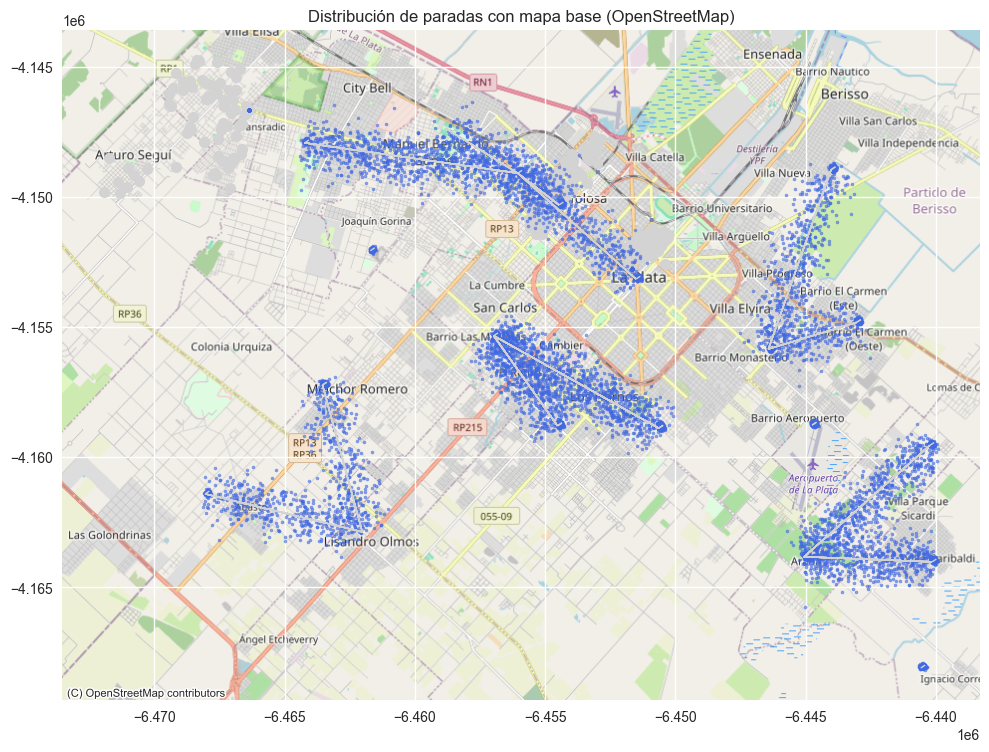

In [20]:
# ------------------------------------------------------------
# CELDA B — GENERACIÓN REALISTA DE PARADAS (VERSIÓN MEJORADA + MAPA BASE)
# ------------------------------------------------------------
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx  # 🗺️ nuevo import

np.random.seed(42)

# ------------------------------------------------------------
# 1️⃣ Función para rutas lineales: dispersión perpendicular + longitudinal
# ------------------------------------------------------------
def sample_along_line(geom, n_points, sigma_base=50):
    points = []
    L = geom.length
    if L == 0:
        return points

    sigma_m = max(sigma_base, min(400, L * 0.05))
    eps = max(1.0, L * 1e-6)

    for _ in range(n_points):
        t = np.random.random() * L
        p = geom.interpolate(t)
        t2 = min(t + eps, L)
        p2 = geom.interpolate(t2)
        dx, dy = p2.x - p.x, p2.y - p.y
        norm = np.hypot(dx, dy)
        if norm == 0:
            continue
        tx, ty = dx / norm, dy / norm
        nx, ny = -ty, tx
        offset_lat = np.random.normal(0, sigma_m)
        offset_long = np.random.normal(0, sigma_m / 3)
        offset_x = nx * offset_lat + tx * offset_long
        offset_y = ny * offset_lat + ty * offset_long
        points.append(Point(p.x + offset_x, p.y + offset_y))
    return points


# ------------------------------------------------------------
# 2️⃣ Función para zonas poligonales
# ------------------------------------------------------------
def gaussian_in_polygon(poly, n_points, sigma_m=80):
    pts = []
    cx, cy = poly.centroid.x, poly.centroid.y
    minx, miny, maxx, maxy = poly.bounds
    attempts = 0
    while len(pts) < n_points and attempts < n_points * 50:
        dx = np.random.normal(0, sigma_m)
        dy = np.random.normal(0, sigma_m)
        p = Point(cx + dx, cy + dy)
        if poly.contains(p):
            pts.append(p)
        attempts += 1
    return pts


# ------------------------------------------------------------
# 3️⃣ Proyección métrica (UTM recomendada)
# ------------------------------------------------------------
try:
    rutas_m = rutas_gdf.to_crs(rutas_gdf.estimate_utm_crs())
except Exception:
    rutas_m = rutas_gdf.to_crs(epsg=3857)

# ------------------------------------------------------------
# 4️⃣ Generación principal de paradas
# ------------------------------------------------------------
paradas_list = []

for _, row in rutas_m.iterrows():
    n = int(row.get("entregas_totales", 0))
    if n == 0 or row.geometry.is_empty:
        continue

    geom = row.geometry

    if geom.geom_type.startswith("Line"):
        puntos = sample_along_line(geom, n, sigma_base=50)
    elif geom.geom_type in ["Polygon", "MultiPolygon"]:
        puntos = gaussian_in_polygon(geom, n, sigma_m=120)
    else:
        puntos = [geom] * n

    for p in puntos:
        paradas_list.append({
            "ruta_id": row.get("ruta_id", None),
            "ruta": row.get("ruta", None),
            "tipo": row.get("tipo", "mixta"),
            "geometry": p
        })

# ------------------------------------------------------------
# 5️⃣ Crear GeoDataFrame final y volver al CRS original
# ------------------------------------------------------------
paradas_gdf_m = gpd.GeoDataFrame(paradas_list, geometry="geometry", crs=rutas_m.crs)
paradas_gdf = paradas_gdf_m.to_crs(rutas_gdf.crs)

# ------------------------------------------------------------
# 6️⃣ Guardar y visualizar con mapa base
# ------------------------------------------------------------
paradas_gdf.to_file("paradas_generadas.geojson", driver="GeoJSON")
print(f"✅ Paradas generadas y guardadas en: paradas_generadas.geojson")
print(f"Total paradas: {len(paradas_gdf)}")

# --- Visualización con mapa de fondo ---
fig, ax = plt.subplots(figsize=(10,10))
rutas_plot = rutas_gdf.to_crs(epsg=3857)
paradas_plot = paradas_gdf.to_crs(epsg=3857)

rutas_plot.plot(ax=ax, color="lightgray", linewidth=1)
paradas_plot.plot(ax=ax, markersize=5, color="royalblue", alpha=0.6)

# 🗺️ Añadir mapa base (OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title("Distribución de paradas con mapa base (OpenStreetMap)")
plt.tight_layout()
plt.show()


In [29]:
rutas_gdf[["ruta_id","ruta","source","tipo","geometry"]].head(20)


,ruta_id,ruta,source,tipo,geometry
0,R001,La Plata Centro,simulada,pura,"LINESTRING (-57.95492 -34.92107, -57.95342 -34..."
1,R002,Los Hornos,simulada,pura,"LINESTRING (-57.98198 -34.96257, -57.98048 -34..."
2,R003,Altos de San Lorenzo,simulada,pura,"LINESTRING (-57.94707 -34.96324, -57.94557 -34..."
3,R004,Villa Parque Sicardi,simulada,pura,"LINESTRING (-57.89692 -34.99959, -57.89542 -34..."
4,R005,Ignacio Correas,simulada,pura,"LINESTRING (-57.85667 -35.03101, -57.85517 -35..."
5,R006,El Carmen,simulada,pura,"LINESTRING (-57.87885 -34.93334, -57.87735 -34..."
6,R007,Ringuelet,simulada,pura,"LINESTRING (-57.99569 -34.89112, -57.99419 -34..."
7,R008,Los Hornos,simulada,pura,"LINESTRING (-57.98198 -34.96257, -57.98048 -34..."
8,R009,Altos de San Lorenzo,simulada,pura,"LINESTRING (-57.94707 -34.96324, -57.94557 -34..."
9,R010,Melchor Romero,simulada,pura,"LINESTRING (-58.06305 -34.95103, -58.06155 -34..."


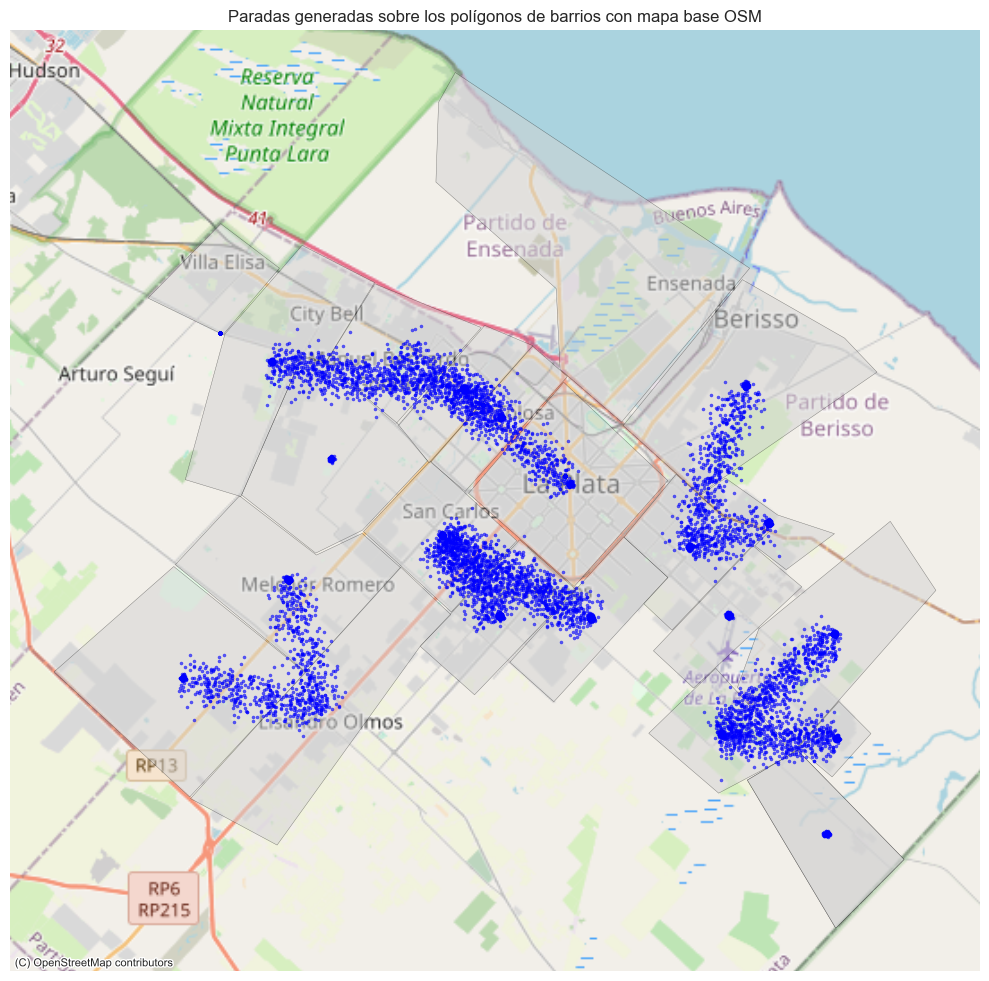

In [30]:
import contextily as ctx
import matplotlib.pyplot as plt

# Asegurarnos de que ambas capas estén en CRS 3857 (proyección compatible con contextily)
barrios_m = barrios.to_crs(epsg=3857)
paradas_m = paradas_gdf.to_crs(epsg=3857)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los polígonos de barrios
barrios_m.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)

# Graficar las paradas
paradas_m.plot(ax=ax, markersize=5, color="blue", alpha=0.6)

# Agregar mapa base de OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Configurar título y eje
ax.set_title("Paradas generadas sobre los polígonos de barrios con mapa base OSM", fontsize=12)
ax.set_axis_off()

plt.tight_layout()
plt.show()


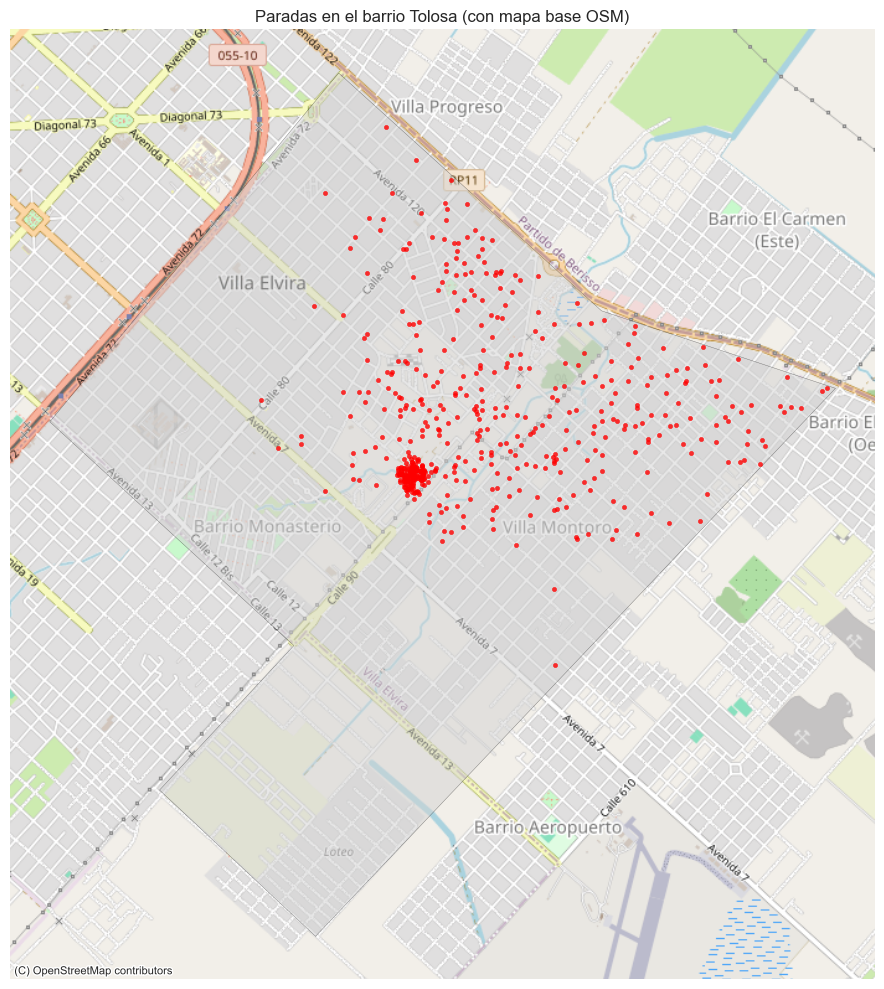

In [32]:
import contextily as ctx
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1️⃣ Filtrar barrio y paradas
# ------------------------------------------------------------
barrio_sel = barrios[barrios["barrio"] == "Villa Elvira"]

# Filtrar paradas dentro del polígono del barrio
paradas_sel = paradas_gdf[paradas_gdf.geometry.within(barrio_sel.geometry.iloc[0])]

# ------------------------------------------------------------
# 2️⃣ Convertir a CRS métrico (compatible con contextily)
# ------------------------------------------------------------
barrio_sel_m = barrio_sel.to_crs(epsg=3857)
paradas_sel_m = paradas_sel.to_crs(epsg=3857)

# ------------------------------------------------------------
# 3️⃣ Graficar
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 10))

# Polígono del barrio
barrio_sel_m.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)

# Puntos de paradas
paradas_sel_m.plot(ax=ax, markersize=10, color="red", alpha=0.8)

# Agregar mapa base (OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Decoración
ax.set_title("Paradas en el barrio Tolosa (con mapa base OSM)", fontsize=12)
ax.set_axis_off()

plt.tight_layout()
plt.show()



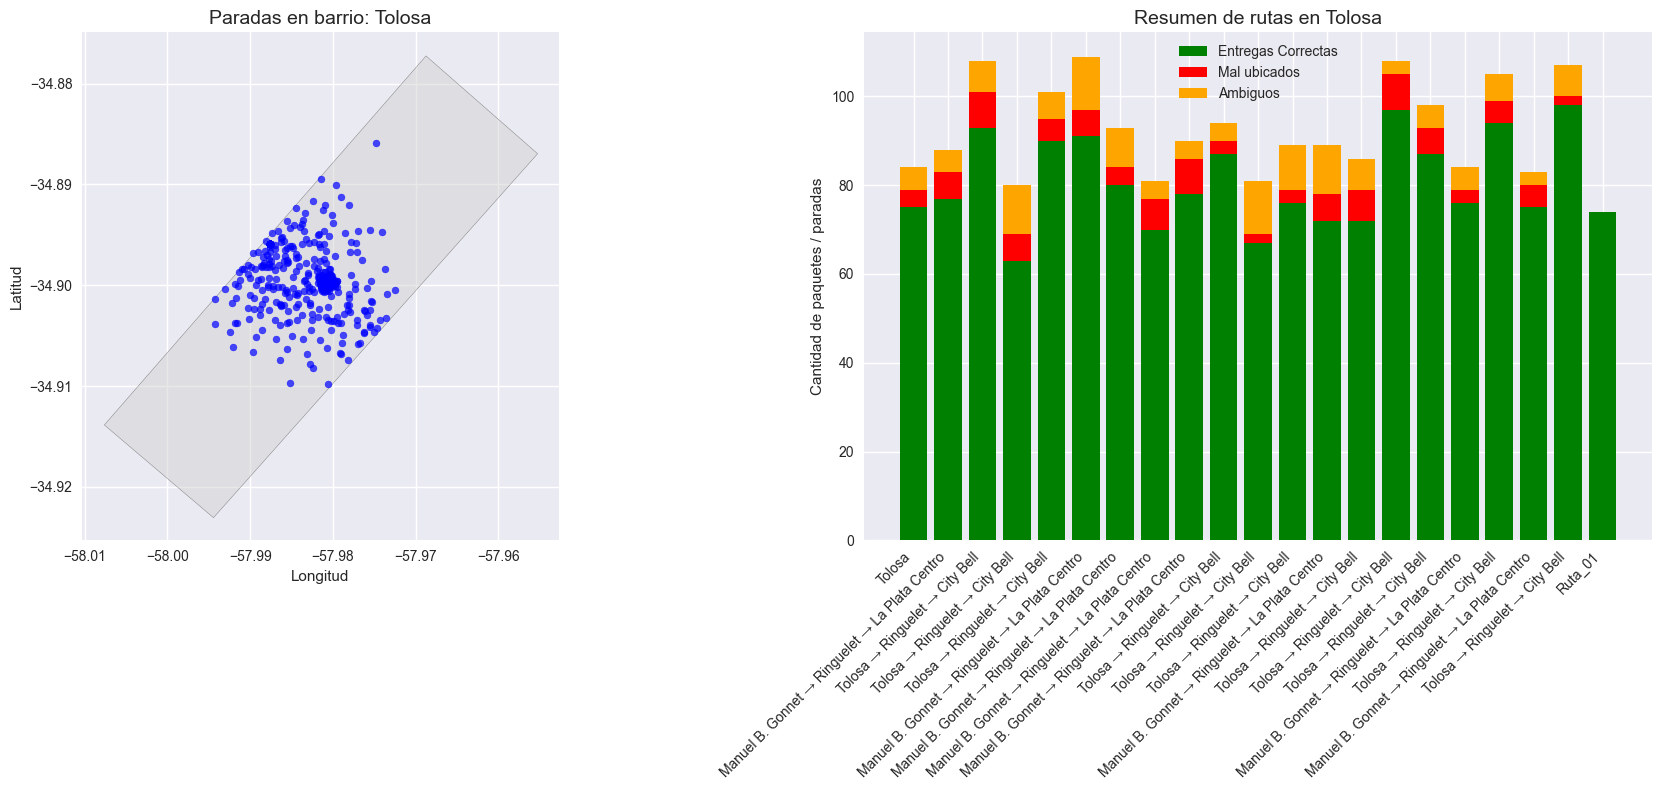

In [24]:
# ------------------------------------------------------------
# CELDA C — VISUALIZACIÓN COMPLETA POR BARRIO Y RUTAS
# ------------------------------------------------------------
import matplotlib.pyplot as plt
import numpy as np

# Elegir barrio a analizar
barrio_objetivo = "Tolosa"  # cambiar según necesites

# 1️⃣ Filtrar polígono del barrio
barrio_sel = barrios[barrios["barrio"] == barrio_objetivo]

# 2️⃣ Filtrar paradas dentro del polígono
paradas_sel = paradas_gdf[paradas_gdf.geometry.within(barrio_sel.geometry.iloc[0])]

# 3️⃣ Obtener rutas que tienen paradas en ese barrio
rutas_sel_ids = paradas_sel["ruta_id"].unique()
rutas_info = rutas_gdf[rutas_gdf["ruta_id"].isin(rutas_sel_ids)].copy()

# 4️⃣ Visualización combinada
fig, axes = plt.subplots(1, 2, figsize=(18,8))

# --- Mapa de paradas sobre polígono del barrio ---
ax_map = axes[0]
barrio_sel.plot(ax=ax_map, color="lightgray", edgecolor="black", alpha=0.5)
paradas_sel.plot(ax=ax_map, markersize=25, color="blue", alpha=0.7)
ax_map.set_title(f"Paradas en barrio: {barrio_objetivo}", fontsize=14)
ax_map.set_xlabel("Longitud")
ax_map.set_ylabel("Latitud")

# --- Gráfico de barras apiladas de rutas ---
ax_bar = axes[1]

# Calcular entregas correctas para la barra apilada
rutas_info["entregas_correctas"] = rutas_info["entregas_totales"] - rutas_info["mal_ubicados"] - rutas_info["ambiguos"]

x = np.arange(len(rutas_info))

ax_bar.bar(x, rutas_info["entregas_correctas"], color="green", label="Entregas Correctas")
ax_bar.bar(x, rutas_info["mal_ubicados"], bottom=rutas_info["entregas_correctas"], color="red", label="Mal ubicados")
ax_bar.bar(x, rutas_info["ambiguos"], bottom=rutas_info["entregas_correctas"] + rutas_info["mal_ubicados"], color="orange", label="Ambiguos")

# Usar nombres de ruta legibles en el eje X
ax_bar.set_xticks(x)
ax_bar.set_xticklabels(rutas_info["ruta"], rotation=45, ha="right")

ax_bar.set_ylabel("Cantidad de paquetes / paradas")
ax_bar.set_title(f"Resumen de rutas en {barrio_objetivo}", fontsize=14)
ax_bar.legend()

plt.tight_layout()
plt.show()

